            Df Sum Sq Mean Sq F value   Pr(>F)    
cristal      1  533.6   533.6 212.747 7.37e-10 ***
fosforo      2   49.8    24.9   9.924  0.00207 ** 
Residuals   14   35.1     2.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$statistics
   MSerror Df      Mean       CV
  2.507937 14 0.4444444 356.3205

$parameters
    test  name.t ntr alpha
  Duncan fosforo   3  0.05

$duncan
     Table CriticalRange
2 3.033186      1.961019
3 3.178300      2.054837

$means
    valores      std r       se Min Max   Q25  Q50  Q75
A  0.000000 5.549775 6 0.646521  -6   6 -4.75  0.0 4.75
B  2.666667 6.501282 6 0.646521  -5  10 -3.00  3.5 7.75
C -1.333333 6.377042 6 0.646521  -8   6 -6.75 -2.0 4.25

$comparison
NULL

$groups
    valores groups
B  2.666667      a
A  0.000000      b
C -1.333333      b

attr(,"class")
[1] "group"


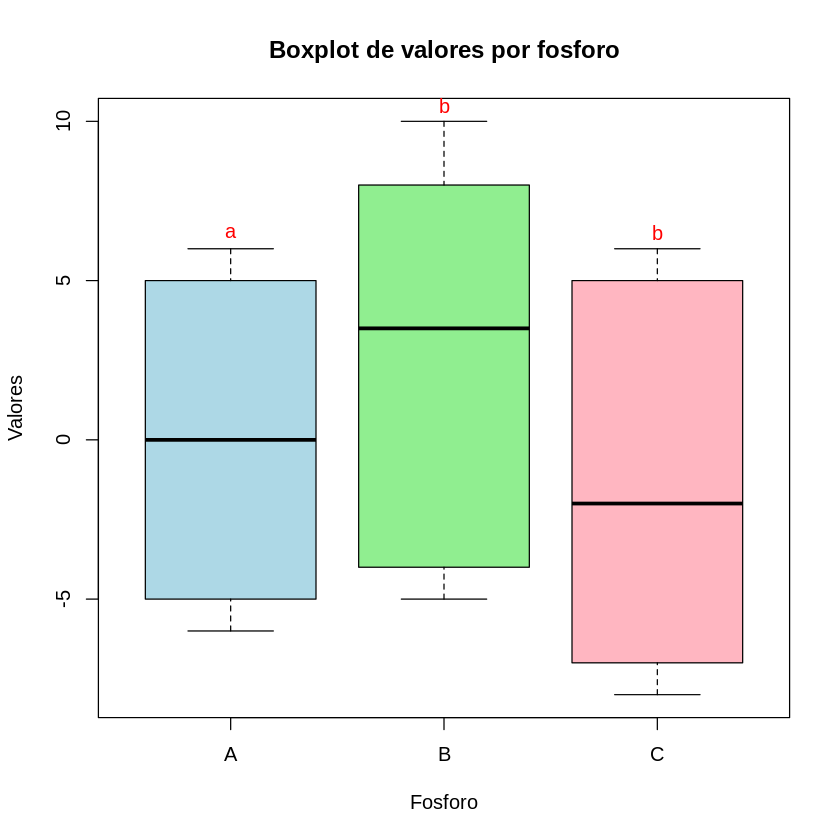

ERROR: Error in leveneTest(valores ~ cristal + fosforo, data = datos): could not find function "leveneTest"


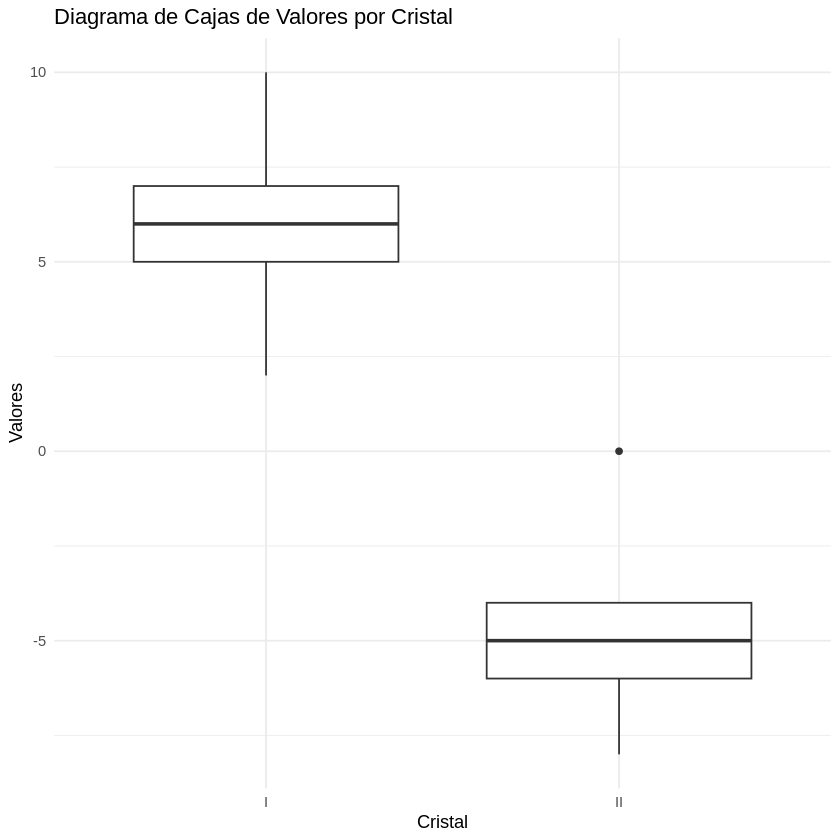

In [ ]:
# Instalar y cargar los paquetes necesarios



library(nortest)
library(agricolae)
library(ggplot2)

datos <- data.frame(valores = c(4, 6, 5,8, 10, 7, 2, 5, 6, -6, -5, -4,0, -4, -5,-8, -7, -6),
                      cristal = rep(c("I", "II"), each = 9),
                      fosforo = rep(c("A", "B", "C"), each = 3))

modelAnova <- aov(valores ~ cristal + fosforo, data = datos)

# Ver los resultados del ANOVA
summary(modelAnova)

##Aplciando el duncan test
duncan <- duncan.test(modelAnova, "fosforo")

# Imprimir los resultados del test de Duncan
print(duncan)


# Crear el boxplot
boxplot(valores ~ fosforo, data = datos, main = "Boxplot de valores por fosforo",
        xlab = "Fosforo", ylab = "Valores", col = c("lightblue", "lightgreen", "lightpink"))

# Añadir las letras del test de Duncan al boxplot
text(1:3, tapply(datos$valores, datos$fosforo, max) + 0.5, duncan$groups$groups, col = "red")


# Crear el diagrama de cajas
ggplot(datos, aes(x = cristal, y = valores)) +
  geom_boxplot() +
  labs(title = "Diagrama de Cajas de Valores por Cristal",
       x = "Cristal",
       y = "Valores") +
  theme_minimal()



  # Ajustar el modelo ANOVA
modelAnova <- aov(valores ~ cristal * fosforo, data = datos)

# Prueba de homocedasticidad usando la prueba de Levene
leveneTest(valores ~ cristal + fosforo, data = datos)

# Obtener los residuos del modelo ANOVA
residuos <- residuals(modelAnova)

# Prueba de normalidad usando la prueba de Anderson-Darling
ad.test(residuos)